## ИМПОРТ БИБИЛИОТЕК

In [82]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
from scipy import stats

## ЗАГРУЗКА ДАННЫХ

In [2]:
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [3]:
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
print('session_csv:', df_sessions.shape)
print('hits_csv:', df_hits.shape)

session_csv: (1860042, 18)
hits_csv: (15726470, 11)


## Data Preparation

### Проверка дубликатов

In [5]:
# проверяем дубликаты в df_sessions
df_sessions.duplicated().sum()

0

In [6]:
# проверяем дубликаты в df_hits`
df_hits.duplicated().sum()

0

### Проверка и преобразование типов данных

In [7]:
df_sessions.dtypes

session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

In [8]:
df_hits.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_type           object
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
event_value       float64
dtype: object

In [9]:
df_sessions.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1.860042e+06,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1.391717e+06,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1.750498e+09,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,4.620000e+02,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_hits.describe(include='all')

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# меняем тип данных на datetime
df_sessions.visit_date = pd.to_datetime(df_sessions.visit_date)
df_sessions.describe(include='all')

C:\Users\User\AppData\Local\Temp/ipykernel_17028/2167034041.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_sessions.describe(include='all')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1.860042e+06,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1.391717e+06,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1.750498e+09,2021-05-24 00:00:00,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,4.620000e+02,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
first,NaN,NaN,2021-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_sessions.dtypes

session_id                          object
client_id                           object
visit_date                  datetime64[ns]
visit_time                          object
visit_number                         int64
utm_source                          object
utm_medium                          object
utm_campaign                        object
utm_adcontent                       object
utm_keyword                         object
device_category                     object
device_os                           object
device_brand                        object
device_model                        object
device_screen_resolution            object
device_browser                      object
geo_country                         object
geo_city                            object
dtype: object

In [13]:
# меняем тип данных на datetime во втором датасете и убираем столбец hit_time
df_hits.hit_date = pd.to_datetime(df_hits.hit_date,utc=True)
df_hits = df_hits.drop(columns=["hit_time"])
df_hits.head()

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [14]:
df_hits.dtypes

session_id                     object
hit_date          datetime64[ns, UTC]
hit_number                      int64
hit_type                       object
hit_referer                    object
hit_page_path                  object
event_category                 object
event_action                   object
event_label                    object
event_value                   float64
dtype: object

### Проверка количества пропусков

<AxesSubplot:>

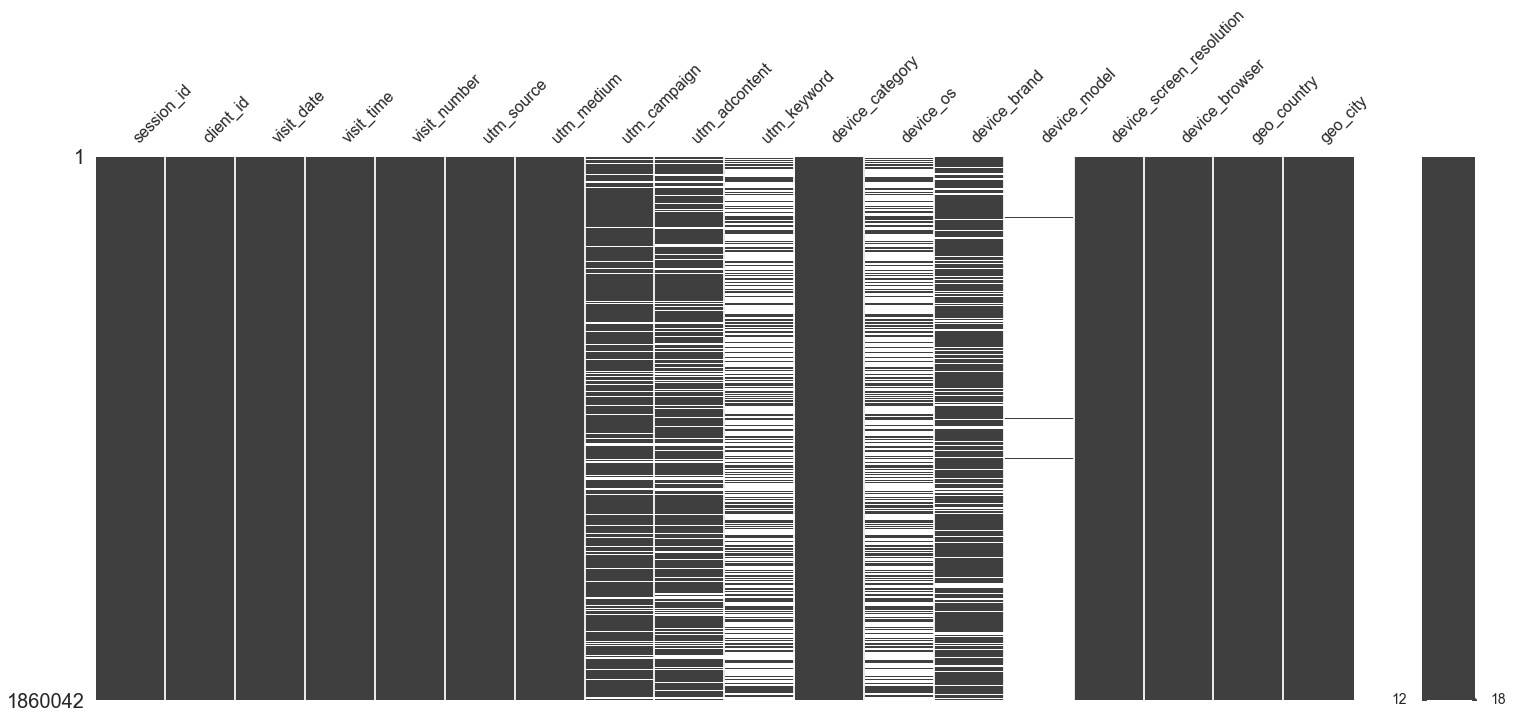

In [15]:
# проверяем пропускаи в df_sessions
msno.matrix(df_sessions)

<AxesSubplot:>

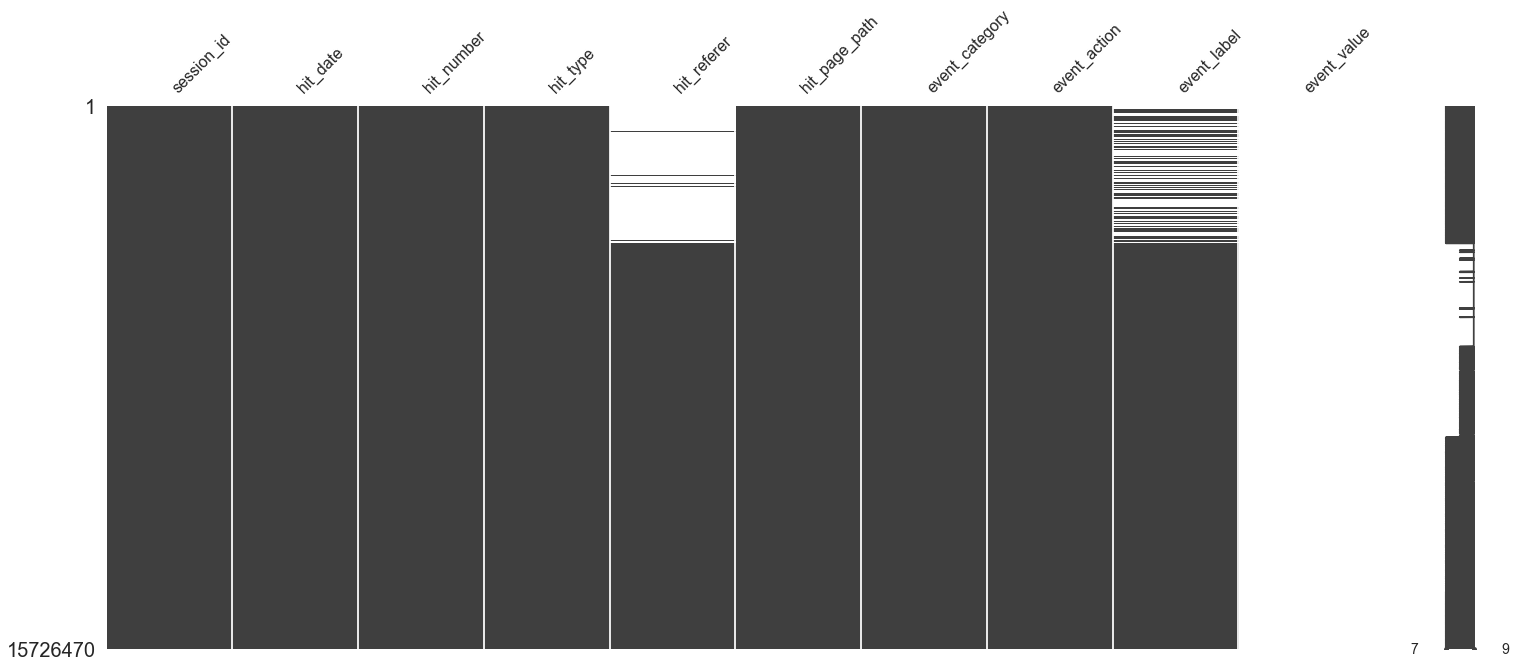

In [16]:
# проверяем пропускаи в df_hits
msno.matrix(df_hits)

In [17]:
# высчитываем % пропущенных значений в df_sessions
missing_values_ses = ((df_sessions.isna().sum() / len(df_sessions)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_ses

Процент пропущенных значений:


session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [18]:
# # высчитываем % пропущенных значений в df_hits
missing_values_hit = ((df_hits.isna().sum() / len(df_hits)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_hit

Процент пропущенных значений:


session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
event_value       100.000000
dtype: float64

## Feature engineering

### Выделение месяца

In [19]:
df_sessions['month'] = df_sessions.visit_date.dt.month

### Разделение целевых действий

In [20]:
# Выбираем только те строки, где были совершены целевые действия
df_hits_event_action = df_hits[(df_hits['event_action'] == 'sub_car_claim_click') |
                               (df_hits['event_action'] == 'sub_car_claim_submit_click') |
                               (df_hits['event_action'] == 'sub_open_dialog_click') |
                               (df_hits['event_action'] == 'sub_custom_question_submit_click') |
                               (df_hits['event_action'] == 'sub_call_number_click') |
                               (df_hits['event_action'] == 'sub_callback_submit_click') |
                               (df_hits['event_action'] == 'sub_submit_success') |
                               (df_hits['event_action'] == 'sub_car_request_submit_click')]
df_hits_event_action

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
4016,2744563715298057088.1640258436.1640258436,2021-12-23 00:00:00+00:00,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4045,3087297479839089634.1640268774.1640268774,2021-12-23 00:00:00+00:00,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4046,3156966333326004302.1640206419.1640206800,2021-12-23 00:00:00+00:00,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4047,3750243879753098158.1640272208.1640272208,2021-12-23 00:00:00+00:00,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4048,7518333712042258254.1640258901.1640258901,2021-12-23 00:00:00+00:00,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,NaN
...,...,...,...,...,...,...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13 00:00:00+00:00,30,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_submit_click,NaN,NaN
15725133,965861352491898977.1636751459.1636751459,2021-11-13 00:00:00+00:00,18,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
15725134,4727705172767122620.1636818847.1636818847,2021-11-13 00:00:00+00:00,43,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,uimgZZmhfLQwbKAZZfCk,NaN
15725135,4727705172767122620.1636818847.1636818847,2021-11-13 00:00:00+00:00,41,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,NaN


In [21]:
# создадим признак по целевому действию и заполним его значением 1
df_hits['target_action'] = df_hits_event_action.apply(lambda x: 1, axis=1)

In [22]:
# остальные строки этого столбца заполним значением 0
df_hits.target_action = df_hits.target_action.fillna(0)

In [23]:
# проверим количество уникальных значений стоблца target_action
df_hits['target_action'].value_counts()

0.0    15621562
1.0      104908
Name: target_action, dtype: int64

In [24]:
df_hits.target_action.astype(int)

0           0
1           0
2           0
3           0
4           0
           ..
15726465    0
15726466    0
15726467    0
15726468    0
15726469    0
Name: target_action, Length: 15726470, dtype: int32

### Разделение органического и платного трафика

In [25]:
# выделим весь органический трафик 
df_utm_medium = df_sessions[(df_sessions['utm_medium'] == '(none)') | 
                            (df_sessions['utm_medium'] == 'organic') | 
                            (df_sessions['utm_medium'] == 'referral')]
df_utm_medium

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,month
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg,5
11,9055469620715506713.1628883994.1628883994,2108390820.162888,2021-08-13,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg,8
12,9055469620715506713.1633110583.1633110583,2108390820.162888,2021-10-01,20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg,10
13,9055469620715506713.1635878177.1635878177,2108390820.162888,2021-11-02,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,412x869,Android Webview,Russia,Sochi,11
28,9055505230298952295.1638478433.1638478433,2108399111.163848,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,NaN,1536x864,Chrome,Russia,Balashikha,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860026,9055355469082180480.1636350848.1636350848,2108364242.163635,2021-11-08,08:54:08,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x873,Chrome,Russia,Moscow,11
1860029,9055376699099939975.1630766214.1630766214,2108369185.163077,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1920x1080,Chrome,Russia,Khimki,9
1860032,9055394269810294140.1629912447.1629912447,2108373276.162991,2021-08-25,20:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x800,Android Webview,Russia,Saint Petersburg,8
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,5


In [26]:
# создадим признак по органическому трафику и заполним его значением organic
df_sessions['traffic'] = df_utm_medium.apply(lambda x: 'organic', axis=1)

In [27]:
# остальные строки этого столбца заполним значением non_organic
df_sessions.traffic = df_sessions.traffic.fillna('non_organic')

In [28]:
# проверим количество уникальных значений стоблца trafic
df_sessions['traffic'].value_counts()

non_organic    1344383
organic         515659
Name: traffic, dtype: int64

### Проверка по типам устройств

In [29]:
# изменим тип данных на category для device_category и проверим уникальные значения столбца для дальнейшей проверки гипотез
df_sessions.device_category.astype('category')
df_sessions.device_category.value_counts()

mobile     1474871
desktop     366863
tablet       18308
Name: device_category, dtype: int64

### Разделение регионов и выделение МО и СПБ

In [30]:
# проверим уникальные значения столбца geo_city
df_sessions.geo_city.value_counts()

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: geo_city, Length: 2548, dtype: int64

In [31]:
# выделим датасет для региона МО и СПБ
df_region = df_sessions[(df_sessions['geo_city'] == 'Aprelevka') |
                     (df_sessions['geo_city'] == 'Balashikha') |
                     (df_sessions['geo_city'] == 'Beloozyorskiy') |
                     (df_sessions['geo_city'] == 'Chekhov') |
                     (df_sessions['geo_city'] == 'Chernogolovka') |
                     (df_sessions['geo_city'] == 'Dedovsk') |
                     (df_sessions['geo_city'] == 'Dmitrov') |
                     (df_sessions['geo_city'] == 'Dolgoprudny') |
                     (df_sessions['geo_city'] == 'Domodedovo') |
                     (df_sessions['geo_city'] == 'Dubna') |
                     (df_sessions['geo_city'] == 'Dzerzhinsky') |
                     (df_sessions['geo_city'] == 'Elektrogorsk') |
                     (df_sessions['geo_city'] == 'Elektrostal') | 
                     (df_sessions['geo_city'] == 'Elektrougli') |
                     (df_sessions['geo_city'] == 'Fryazino') |
                     (df_sessions['geo_city'] == 'Golitsyno') |
                     (df_sessions['geo_city'] == 'Istra') |
                     (df_sessions['geo_city'] == 'Ivanteyevka') |
                     (df_sessions['geo_city'] == 'Izhevsk') |
                     (df_sessions['geo_city'] == 'Kashira') |
                     (df_sessions['geo_city'] == 'Khimki') |
                     (df_sessions['geo_city'] == 'Khotkovo') |
                     (df_sessions['geo_city'] == 'Klin') |
                     (df_sessions['geo_city'] == 'Kolomna') |
                     (df_sessions['geo_city'] == 'Korolyov') |
                     (df_sessions['geo_city'] == 'Kotelniki') |
                     (df_sessions['geo_city'] == 'Krasnoarmeysk') |
                     (df_sessions['geo_city'] == 'Krasnogorsk') |
                     (df_sessions['geo_city'] == 'Krasnoznamensk') |
                     (df_sessions['geo_city'] == 'Kubinka') |
                     (df_sessions['geo_city'] == 'Kurovskoye') |
                     (df_sessions['geo_city'] == 'Likino-Dulyovo') |
                     (df_sessions['geo_city'] == 'Lobnya') |
                     (df_sessions['geo_city'] == 'Losino-Petrovsky') |
                     (df_sessions['geo_city'] == 'Lukhovitsy') |
                     (df_sessions['geo_city'] == 'Lytkarino') |
                     (df_sessions['geo_city'] == 'Lyubertsy') |
                     (df_sessions['geo_city'] == 'Moscow') |
                     (df_sessions['geo_city'] == 'Mozhaysk') |
                     (df_sessions['geo_city'] == 'Mytishchi') |
                     (df_sessions['geo_city'] == 'Naro-Fominsk') |
                     (df_sessions['geo_city'] == 'Noginsk') |
                     (df_sessions['geo_city'] == 'Odintsovo') |
                     (df_sessions['geo_city'] == 'Orekhovo-Zuyevo') |
                     (df_sessions['geo_city'] == 'Pavlovsky Posad') |
                     (df_sessions['geo_city'] == 'Podolsk') |
                     (df_sessions['geo_city'] == 'Protvino') |
                     (df_sessions['geo_city'] == 'Pushchino') |
                     (df_sessions['geo_city'] == 'Pushkino') |
                     (df_sessions['geo_city'] == 'Ramenskoye') |
                     (df_sessions['geo_city'] == 'Reutov') |
                     (df_sessions['geo_city'] == 'Ruza') |
                     (df_sessions['geo_city'] == 'Saint Petersburg') |
                     (df_sessions['geo_city'] == 'Sergiyev Posad') |
                     (df_sessions['geo_city'] == 'Serpukhov') |
                     (df_sessions['geo_city'] == 'Solnechnogorsk') |
                     (df_sessions['geo_city'] == 'Staraya Kupavna') |
                     (df_sessions['geo_city'] == 'Stupino') |
                     (df_sessions['geo_city'] == 'Shchyolkovo') |
                     (df_sessions['geo_city'] == 'Shatura') |
                     (df_sessions['geo_city'] == 'Vidnoye') |
                     (df_sessions['geo_city'] == 'Volokolamsk') |
                     (df_sessions['geo_city'] == 'Voskresensk') |
                     (df_sessions['geo_city'] == 'Yakhroma') |
                     (df_sessions['geo_city'] == 'Zvenigorod')]
df_region

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,month,traffic
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,11,non_organic
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,5,non_organic
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,5,non_organic
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg,5,organic
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg,12,non_organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860032,9055394269810294140.1629912447.1629912447,2108373276.162991,2021-08-25,20:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x800,Android Webview,Russia,Saint Petersburg,8,organic
1860035,9055398929844789828.1624891784.1624891784,2108374361.162489,2021-06-28,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,NaN,NaN,mobile,NaN,Samsung,NaN,320x676,Chrome,Russia,Naro-Fominsk,6,non_organic
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow,12,non_organic
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,11,organic


In [32]:
# создадим ноый признак region и заполним значениями mo_spb те строки, которые относятся к МО и СПБ
df_sessions['region'] = df_region.apply(lambda x: 'mo_spb', axis=1)

In [33]:
# остальные строки этого столбца заполним значением other
df_sessions.region = df_sessions.region.fillna('other')

In [34]:
# проверим уникальные значения столбца region
df_sessions.region.value_counts()

mo_spb    1207444
other      652598
Name: region, dtype: int64

### Выделение моделей авто

In [35]:
# выделим модели и бренды авто из ссылок в столбце hit_page_path
model = df_hits[(df_hits.hit_page_path.str.contains(r'\bsberauto.com/cars/all')) |
               df_hits.hit_page_path.str.contains(r'\bsberauto-team.com/cars/all')]
model

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,target_action
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN,0.0
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN,0.0
7,4024492994895054107.1640269084.1640269084,2021-12-23 00:00:00+00:00,85,event,NaN,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,NaN,NaN,0.0
8,555009234841130092.1640256620.1640256620,2021-12-23 00:00:00+00:00,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,NaN,NaN,0.0
9,2692901778487480807.1640206845.1640206845,2021-12-23 00:00:00+00:00,1,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23 00:00:00+00:00,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN,0.0
15726466,7310304587364460692.1640261783.1640261783,2021-12-23 00:00:00+00:00,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN,0.0
15726467,8013702685784312179.1640270195.1640270195,2021-12-23 00:00:00+00:00,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN,0.0
15726468,8021505554734405918.1640257821.1640257821,2021-12-23 00:00:00+00:00,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN,0.0


In [36]:
print('Процент заполненой модели в hits: ', len(model) / len(df_hits) *100)
# хоть и небольшой процент получился, но будем работать с тем, что есть

Процент заполненой модели в hits:  21.713315194064528


In [37]:
# выделим бренд из той же ссылки
df_hits['brand'] = model.hit_page_path.apply(lambda x: x.split('/')[3])

In [38]:
# проверим сколько уникальных значений брендов получилось
print('Количество уникальных значений: ', df_hits.brand.value_counts().sum())
df_hits.brand.value_counts()

Количество уникальных значений:  3414738


skoda            744486
mercedes-benz    472316
volkswagen       417128
lada-vaz         403910
nissan           238689
kia              236270
bmw              195391
toyota           160840
renault          150656
porsche           63569
lexus             61631
audi              60035
volvo             51627
haval             51538
mini              34709
peugeot           27431
land-rover        24872
hyundai           19032
honda               397
infiniti            211
Name: brand, dtype: int64

In [39]:
# выделим модель из той же ссылки и проверим сколько уникальных значений моделей получилось
df_hits['model'] = model.hit_page_path.apply(lambda x: x.split('/')[4])

In [40]:
print('Количество уникальных значений: ', df_hits.model.value_counts().sum())
df_hits.model.value_counts()

Количество уникальных значений:  3414738


rapid         442492
vesta         403910
polo          318075
karoq         194264
e-klasse      178467
               ...  
x4-m             103
k5                36
v-klasse          18
cls-klasse        13
a5                 6
Name: model, Length: 74, dtype: int64

### Выделение источников из рекламных сетей

In [41]:
df_sessions_socialnet_adv = df_sessions[(df_sessions['utm_source'] == 'QxAxdyPLuQMEcrdZWdWb') |
                                     (df_sessions['utm_source'] == 'MvfHsxITijuriZxsqZqt') |
                                     (df_sessions['utm_source'] == 'ISrKoXQCxqqYvAZICvjs') |
                                     (df_sessions['utm_source'] == 'IZEXUFLARCUMynmHNBGo') |
                                     (df_sessions['utm_source'] == 'PlbkrSYoHuZBWfYjYnfw') |
                                     (df_sessions['utm_source'] == 'gVRrcxiDQubJiljoTbGm')]
df_sessions_socialnet_adv

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,month,traffic,region
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,11,non_organic,mo_spb
13,9055469620715506713.1635878177.1635878177,2108390820.162888,2021-11-02,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,Android,Samsung,NaN,412x869,Android Webview,Russia,Sochi,11,organic,other
21,9055497958914887309.1634045644.1634045644,2108397418.163404,2021-10-12,16:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,...,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,10,non_organic,mo_spb
22,9055497958914887309.1634046980.1634046980,2108397418.163404,2021-10-12,16:00:00,2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,...,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,10,non_organic,mo_spb
23,9055497958914887309.1634048072.1634048072,2108397418.163404,2021-10-12,17:00:00,3,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,...,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,10,non_organic,mo_spb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860024,9055349030922605117.1632752193.1632752193,2108362743.163275,2021-09-27,17:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,...,NaN,BQ,NaN,640x360,YaBrowser,Russia,Saint Petersburg,9,non_organic,mo_spb
1860027,9055363711117247375.1629176721.1629176721,2108366161.162918,2021-08-17,08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,...,NaN,NaN,NaN,1920x1080,Chrome,Russia,(not set),8,non_organic,other
1860028,9055373598132450813.1629664766.1629664766,2108368463.162966,2021-08-22,23:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,...,NaN,Xiaomi,NaN,851x393,Chrome,Russia,Saint Petersburg,8,non_organic,mo_spb
1860030,9055382948278467242.1631877802.1631877802,2108370640.163188,2021-09-17,14:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,...,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Saint Petersburg,9,non_organic,mo_spb


In [42]:
# создадим ноый признак adv и заполним значениями 1 те строки, которые относятся к рекламе через соцсети
df_sessions['adv'] = df_sessions_socialnet_adv.apply(lambda x: 1, axis=1)

In [43]:
# остальные строки этого столбца заполним значением 0
df_sessions.adv = df_sessions.adv.fillna(0)

In [44]:
df_sessions.adv.astype(int)

0          0
1          1
2          0
3          0
4          0
          ..
1860037    0
1860038    0
1860039    0
1860040    0
1860041    0
Name: adv, Length: 1860042, dtype: int32

In [45]:
# проверим уникальные значения столбца adv
df_sessions.adv.value_counts()

0.0    1585815
1.0     274227
Name: adv, dtype: int64

## Data Cleaning

### Удаление ненужных признаков

In [46]:
col_for_drop_hits = ['hit_number', 
                     'hit_type',
                     'hit_page_path',
                     'event_category',
                     'event_action',
                     'event_label',
                     'event_value',
                     'hit_referer'
                     ]
hits = df_hits.drop(columns=col_for_drop_hits)
hits

,session_id,hit_date,target_action,brand,model
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,0.0,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,0.0,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,0.0,volkswagen,polo
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,0.0,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,cla-klasse
...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23 00:00:00+00:00,0.0,toyota,fortuner
15726466,7310304587364460692.1640261783.1640261783,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,gla-klasse
15726467,8013702685784312179.1640270195.1640270195,2021-12-23 00:00:00+00:00,0.0,toyota,alphard
15726468,8021505554734405918.1640257821.1640257821,2021-12-23 00:00:00+00:00,0.0,bmw,x3


In [47]:
col_for_drop_sess = ['visit_number',
                     'visit_time',                 
                     'utm_medium',
                     'utm_adcontent',
                     'utm_keyword',
                     'device_os',
                     'device_model',
                     'device_screen_resolution',
                     'device_browser']
sessions = df_sessions.drop(columns=col_for_drop_sess)
sessions

,session_id,client_id,visit_date,utm_source,utm_campaign,device_category,device_brand,geo_country,geo_city,month,traffic,region,adv
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Zlatoust,11,non_organic,other,0.0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Russia,Moscow,11,non_organic,mo_spb,1.0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Russia,Krasnoyarsk,12,non_organic,other,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,kjsLglQLzykiRbcDiGcD,NaN,mobile,Xiaomi,Russia,Moscow,5,non_organic,mo_spb,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,kjsLglQLzykiRbcDiGcD,NaN,mobile,Xiaomi,Russia,Moscow,5,non_organic,mo_spb,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,BHcvLfOaCWvWTykYqHVe,NaN,desktop,NaN,Russia,Moscow,12,non_organic,mo_spb,0.0
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Russia,Stavropol,5,organic,other,0.0
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Russia,Moscow,11,organic,mo_spb,0.0
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Russia,Chelyabinsk,11,non_organic,other,0.0


### Создание таблицы для работы с марками авто

In [48]:
# нам нужны только те строки, где модель и марка авто заполнены, марка заполнена в большем количестве строк, поэтому берем ее
hits_brand = hits[hits.brand.notna()]
hits_brand

,session_id,hit_date,target_action,brand,model
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,0.0,volkswagen,polo
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,cla-klasse
7,4024492994895054107.1640269084.1640269084,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,glc
8,555009234841130092.1640256620.1640256620,2021-12-23 00:00:00+00:00,0.0,kia,sorento
9,2692901778487480807.1640206845.1640206845,2021-12-23 00:00:00+00:00,0.0,nissan,x-trail
...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23 00:00:00+00:00,0.0,toyota,fortuner
15726466,7310304587364460692.1640261783.1640261783,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,gla-klasse
15726467,8013702685784312179.1640270195.1640270195,2021-12-23 00:00:00+00:00,0.0,toyota,alphard
15726468,8021505554734405918.1640257821.1640257821,2021-12-23 00:00:00+00:00,0.0,bmw,x3


In [49]:
# пропуски в столбце model заполним значением other
hits_brand.model = hits_brand.model.fillna('other')
hits_brand

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,session_id,hit_date,target_action,brand,model
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,0.0,volkswagen,polo
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,cla-klasse
7,4024492994895054107.1640269084.1640269084,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,glc
8,555009234841130092.1640256620.1640256620,2021-12-23 00:00:00+00:00,0.0,kia,sorento
9,2692901778487480807.1640206845.1640206845,2021-12-23 00:00:00+00:00,0.0,nissan,x-trail
...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23 00:00:00+00:00,0.0,toyota,fortuner
15726466,7310304587364460692.1640261783.1640261783,2021-12-23 00:00:00+00:00,0.0,mercedes-benz,gla-klasse
15726467,8013702685784312179.1640270195.1640270195,2021-12-23 00:00:00+00:00,0.0,toyota,alphard
15726468,8021505554734405918.1640257821.1640257821,2021-12-23 00:00:00+00:00,0.0,bmw,x3


<AxesSubplot:>

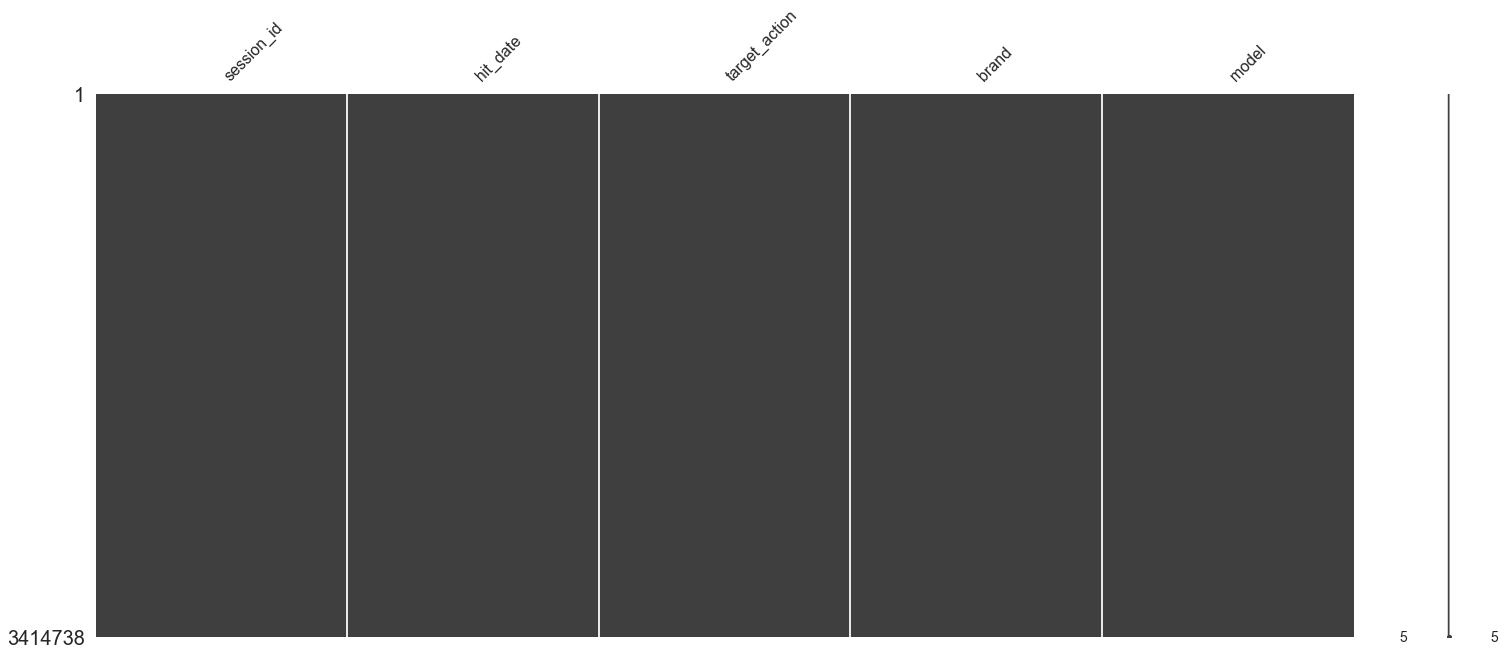

In [50]:
# проверим пропуски в этом датасете
msno.matrix(hits_brand)

In [51]:
# высчитываем % пропущенных значений в hits_brand
missing_values_hb = ((hits_brand.isna().sum() / len(hits_brand)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_hb

Процент пропущенных значений:


session_id       0.0
hit_date         0.0
target_action    0.0
brand            0.0
model            0.0
dtype: float64

In [52]:
# датасет готов к работе, сохраним его для дальнеших расчетов
hits_brand.to_csv('hits_brand.csv', index=False)

### Добавление признака целевого действия к основному датасету

In [53]:
# создадим промежуточную таблицу с признаками session_id (для объединения) и target_action (для дальнейших расчетов)
target_df = hits.groupby(['session_id']).agg({'target_action':'sum'})
target_df['target'] = target_df.target_action.apply(lambda x: 1 if x > 0 else 0)
target_df.drop(['target_action'], inplace=True, axis=1)
target_df

,target
session_id,
1000009318903347362.1632663668.1632663668,0
1000010177899156286.1635013443.1635013443,0
1000013386240115915.1635402956.1635402956,0
1000017303238376207.1623489300.1623489300,0
1000020580299877109.1624943350.1624943350,0
...,...
999960188766601545.1626816843.1626816843,0
99996598443387715.1626811203.1626811203,0
999966717128502952.1638428330.1638428330,0


In [54]:
sessions_df = pd.merge(target_df, sessions, how='left', on='session_id')
sessions_df

,session_id,target,client_id,visit_date,utm_source,utm_campaign,device_category,device_brand,geo_country,geo_city,month,traffic,region,adv
0,1000009318903347362.1632663668.1632663668,0,232832813.163266,2021-09-26,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Russia,Gelendzhik,9.0,non_organic,other,1.0
1,1000010177899156286.1635013443.1635013443,0,232833013.163501,2021-10-23,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Russia,Voronezh,10.0,organic,other,0.0
2,1000013386240115915.1635402956.1635402956,0,232833760.16354,2021-10-28,ZpYIoDJMcFzVoPFsHGJL,gecBYcKZCPMcVYdSSzKP,mobile,Samsung,Russia,Cherkessk,10.0,non_organic,other,0.0
3,1000017303238376207.1623489300.1623489300,0,232834672.162349,2021-06-12,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Realme,Russia,Irkutsk,6.0,non_organic,other,0.0
4,1000020580299877109.1624943350.1624943350,0,232835435.162494,2021-06-29,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Russia,Moscow,6.0,organic,mo_spb,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734605,999960188766601545.1626816843.1626816843,0,232821374.162682,2021-07-21,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,mobile,Huawei,Russia,Moscow,7.0,non_organic,mo_spb,1.0
1734606,99996598443387715.1626811203.1626811203,0,23282272.162681,2021-07-20,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Apple,Russia,Saint Petersburg,7.0,non_organic,mo_spb,0.0
1734607,999966717128502952.1638428330.1638428330,0,232822894.163843,2021-12-02,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Russia,Nizhny Novgorod,12.0,non_organic,other,0.0
1734608,999988617151873171.1623556243.1623556243,0,232827993.162356,2021-06-13,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,mobile,Samsung,Russia,Chelyabinsk,6.0,non_organic,other,0.0


#### Проверка и обработка пропусков

In [55]:
# проверяем пропуски в датасете sessions_df
missing_values_sess = ((sessions_df.isna().sum() / len(sessions_df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_sess

Процент пропущенных значений:


session_id          0.000000
target              0.000000
client_id           0.135131
visit_date          0.135131
device_category     0.135131
geo_country         0.135131
geo_city            0.135131
month               0.135131
traffic             0.135131
region              0.135131
adv                 0.135131
utm_source          0.139513
utm_campaign       11.393397
device_brand       20.150927
dtype: float64

In [56]:
# удалим те строки, где пропущено большинство значений, и этих строк менее 1%
for_drop = sessions_df[sessions_df.client_id.isna() &
                       sessions_df.visit_date.isna() &
                       sessions_df.device_category.isna() & 
                       sessions_df.geo_country.isna() &
                       sessions_df.geo_city.isna() &
                       sessions_df.traffic.isna() &
                       sessions_df.region.isna() & 
                       sessions_df.month.isna() &
                       sessions_df.adv.isna() &
                       sessions_df.utm_source.isna() &
                       sessions_df.utm_campaign.isna() & 
                       sessions_df.device_brand.isna()].index.tolist()
sessions_df.drop(for_drop, inplace=True)

In [57]:
# снова проверяем пропуски
missing_values_sess2 = ((sessions_df.isna().sum() / len(sessions_df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_sess2

Процент пропущенных значений:


session_id          0.000000
target              0.000000
client_id           0.000000
visit_date          0.000000
device_category     0.000000
geo_country         0.000000
geo_city            0.000000
month               0.000000
traffic             0.000000
region              0.000000
adv                 0.000000
utm_source          0.004387
utm_campaign       11.273500
device_brand       20.042880
dtype: float64

In [58]:
#удалим небольшой % строк, где в столбце utm_source есть пропуски
sessions_df.drop(sessions_df[sessions_df.utm_source.isna()].index.tolist(), inplace=True)

In [59]:
# остальные пропуски заполним значением other
sessions_df.utm_campaign = sessions_df.utm_campaign.fillna('other')
sessions_df.device_brand = sessions_df.device_brand.fillna('other')

<AxesSubplot:>

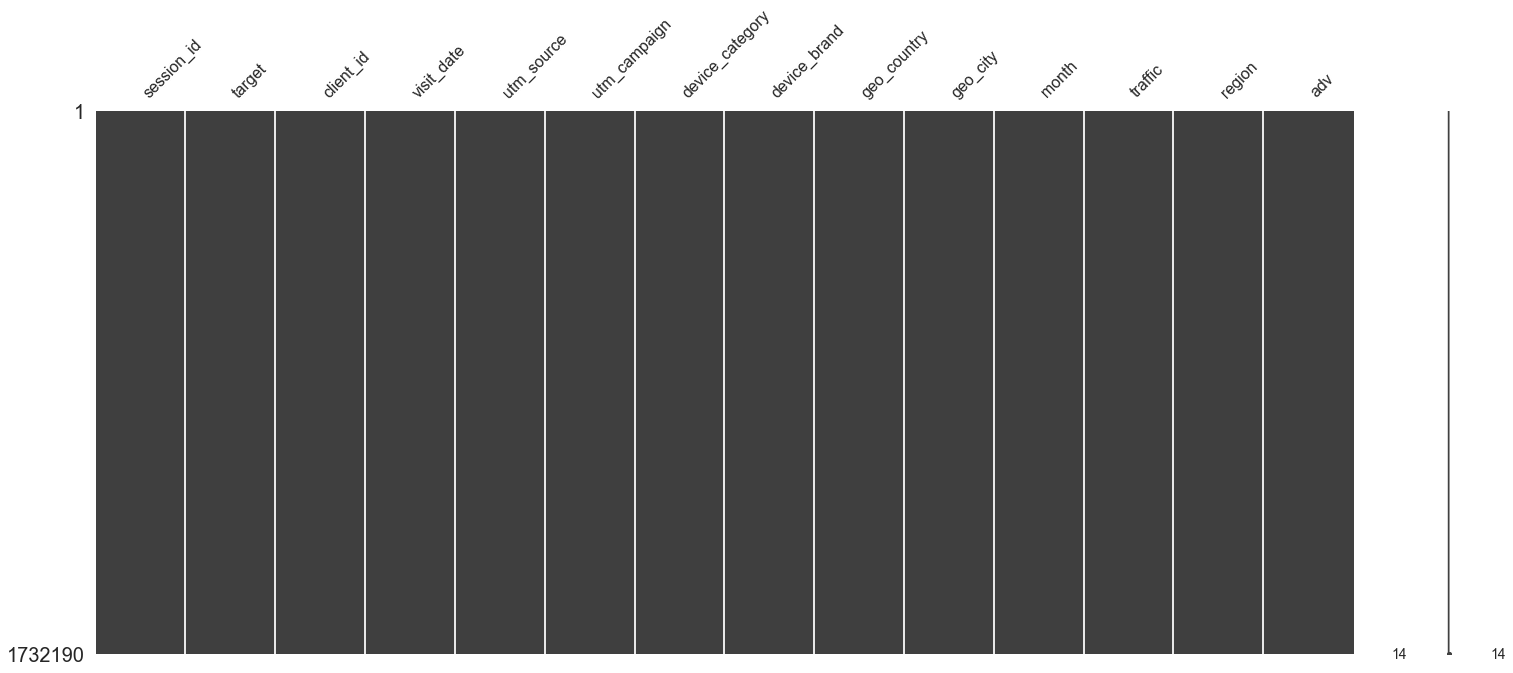

In [60]:
#проверяем пропуски
msno.matrix(sessions_df)

In [61]:
# снова проверяем пропуски
missing_values_sess3 = ((sessions_df.isna().sum() / len(sessions_df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_sess3

Процент пропущенных значений:


session_id         0.0
target             0.0
client_id          0.0
visit_date         0.0
utm_source         0.0
utm_campaign       0.0
device_category    0.0
device_brand       0.0
geo_country        0.0
geo_city           0.0
month              0.0
traffic            0.0
region             0.0
adv                0.0
dtype: float64

In [62]:
sessions_df.columns

Index(['session_id', 'target', 'client_id', 'visit_date', 'utm_source',
       'utm_campaign', 'device_category', 'device_brand', 'geo_country',
       'geo_city', 'month', 'traffic', 'region', 'adv'],
      dtype='object')

In [63]:
# датасет готов к работе, сохраним его для дальнеших расчетов
sessions_df.to_csv('sessions_df.csv', index=False)

## Проверка гипотез

### Органический трафик не отличается от платного с точки зрения CR в целевые события

In [91]:
# создадим сводную таблицу по органическому трафику и посчитаем конверсию органического  трафика в целевые действия
calc1 = sessions_df.loc[sessions_df['traffic'] == 'organic'] \
                .groupby(['visit_date']) \
                .agg({'target':'sum', 'session_id': 'nunique'}) \
                .reset_index()
calc1['cr_org'] = 100 * calc1['target'] / calc1['session_id']
traff_organic = calc1.drop(columns=['target', 'session_id'])
traff_organic

,visit_date,cr_org
0,2021-05-19,7.173601
1,2021-05-21,0.000000
2,2021-05-22,1.443001
3,2021-05-23,4.581901
4,2021-05-24,6.499459
...,...,...
221,2021-12-27,1.617710
222,2021-12-28,1.223865
223,2021-12-29,1.843003
224,2021-12-30,1.626016


In [92]:
# создадим сводную таблицу по платному трафику и посчитаем конверсию платного трафика в целевые действия
calc2 = sessions_df.loc[sessions_df['traffic'] == 'non_organic'] \
                .groupby(['visit_date']) \
                .agg({'target':'sum', 'session_id': 'nunique'}) \
                .reset_index()
calc2['cr_paid'] = 100 * calc2['target'] / calc2['session_id']
traff_paid = calc2.drop(columns=['target', 'session_id'])
traff_paid

,visit_date,cr_paid
0,2021-05-19,0.000000
1,2021-05-21,0.000000
2,2021-05-22,1.470588
3,2021-05-23,2.542373
4,2021-05-24,3.030303
...,...,...
221,2021-12-27,2.214399
222,2021-12-28,2.191194
223,2021-12-29,1.763571
224,2021-12-30,1.358234


In [99]:
#  и объединим обе конверсии в одну таблицу для проверки гипотезы
traff_all = sessions_df.groupby(['visit_date']).agg({'session_id': 'nunique'}).reset_index()
traff_all = traff_all.merge(traff_organic, how='left', on='visit_date')
traff_all = traff_all.merge(traff_paid, how='left', on='visit_date')
traff_all = traff_all.drop(columns=['session_id']).reset_index(drop=True)

traff_all

,visit_date,cr_org,cr_paid
0,2021-05-19,7.173601,0.000000
1,2021-05-21,0.000000,0.000000
2,2021-05-22,1.443001,1.470588
3,2021-05-23,4.581901,2.542373
4,2021-05-24,6.499459,3.030303
...,...,...,...
221,2021-12-27,1.617710,2.214399
222,2021-12-28,1.223865,2.191194
223,2021-12-29,1.843003,1.763571
224,2021-12-30,1.626016,1.358234


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


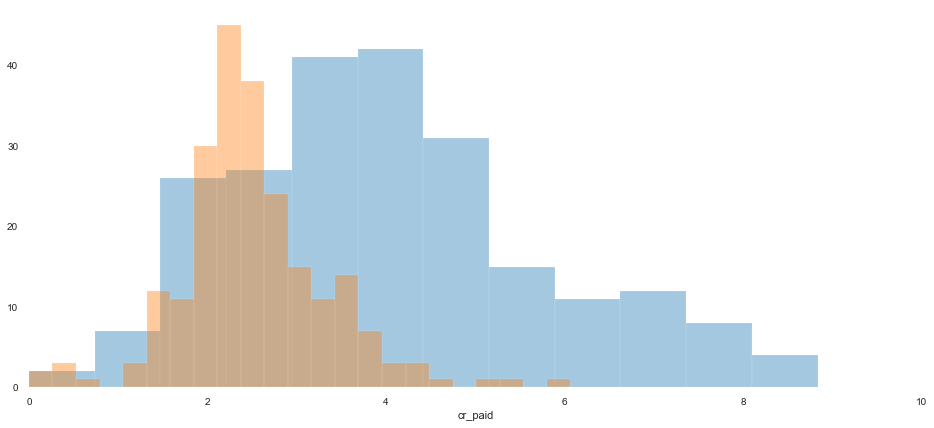

In [94]:
# построим график распределения
fig, ax = plt.subplots(figsize=(16,7))
for el in [traff_all['cr_org'], traff_all['cr_paid']]:
    sns.distplot(el, ax=ax, kde=False)
ax.set_xlim([0, 10])
plt.show()

In [100]:
# проверим распределение на нормальность тестом Шапиро
traff_sh = np.concatenate((traff_all.sort_values(by=['cr_org'])['cr_org'].values, 
                        traff_all.sort_values(by=['cr_paid'])['cr_paid'].values))
stats.shapiro(traff_sh)

ShapiroResult(statistic=0.9192128777503967, pvalue=7.662228700643352e-15)

Выборки имеют ненормальное распределение - используем непараметрические критерии. Выборки независимы, поэтому используем критерий Манна Уитни

H0: Органический трафик не отличается от платного с точки зрения конверсии в целевые события

H1: Конверсия в целевые события от органического трафика выше, чем от платного

In [102]:
stats.mannwhitneyu(traff_all['cr_org'], traff_all['cr_paid'], alternative='greater')

MannwhitneyuResult(statistic=39637.5, pvalue=1.5962465123037001e-24)

Нулевая гипотеза отвергнута - принимаем альтернативную: Конверсия в целевые события от органического трафика выше, чем от платного

### Трафик с мобильных устройств не отличается от трафика с декстопных устройств с точки зрения CR в целевые события

In [103]:
# создадим сводную таблицу по мобильным устройствам и посчитаем конверсию в целевые действия
calc3 = sessions_df.loc[(sessions_df.device_category == 'mobile') | (sessions_df.device_category == 'tablet')] \
                .groupby(['visit_date']) \
                .agg({'target':'sum', 'session_id': 'nunique'}) \
                .reset_index()
calc3['cr_mob'] = 100 * calc3['target'] / calc3['session_id']
dev_mobile = calc3.drop(columns=['target', 'session_id'])
dev_mobile

,visit_date,cr_mob
0,2021-05-19,6.918239
1,2021-05-21,0.000000
2,2021-05-22,1.369863
3,2021-05-23,4.139715
4,2021-05-24,6.441731
...,...,...
221,2021-12-27,2.032141
222,2021-12-28,2.134679
223,2021-12-29,1.890130
224,2021-12-30,1.590281


In [105]:
# создадим сводную таблицу по десктопным устройствам и посчитаем конверсию в целевые действия
calc4 = sessions_df.loc[sessions_df['device_category'] == 'desktop'] \
                .groupby(['visit_date']) \
                .agg({'target':'sum', 'session_id': 'nunique'}) \
                .reset_index()
calc4['cr_desk'] = 100 * calc4['target'] / calc4['session_id']
dev_desktop = calc4.drop(columns=['target', 'session_id'])
dev_desktop

,visit_date,cr_desk
0,2021-05-19,7.272727
1,2021-05-21,0.000000
2,2021-05-22,1.600000
3,2021-05-23,4.166667
4,2021-05-24,6.499578
...,...,...
221,2021-12-27,2.450331
222,2021-12-28,1.295160
223,2021-12-29,0.992556
224,2021-12-30,0.413983


In [106]:
#  и объединим обе конверсии в одну таблицу для проверки гипотезы
dev_all = sessions_df.groupby(['visit_date']).agg({'session_id': 'nunique'}).reset_index()
dev_all = dev_all.merge(dev_mobile, how='left', on='visit_date')
dev_all = dev_all.merge(dev_desktop, how='left', on='visit_date')
dev_all = dev_all.drop(columns=['session_id']).reset_index(drop=True)

dev_all

,visit_date,cr_mob,cr_desk
0,2021-05-19,6.918239,7.272727
1,2021-05-21,0.000000,0.000000
2,2021-05-22,1.369863,1.600000
3,2021-05-23,4.139715,4.166667
4,2021-05-24,6.441731,6.499578
...,...,...,...
221,2021-12-27,2.032141,2.450331
222,2021-12-28,2.134679,1.295160
223,2021-12-29,1.890130,0.992556
224,2021-12-30,1.590281,0.413983


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


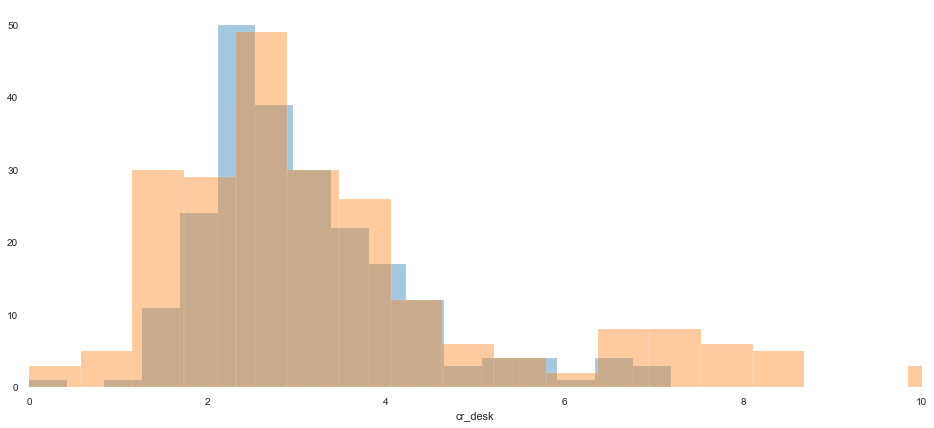

In [107]:
# построим график распределения
fig, ax = plt.subplots(figsize=(16,7))
for el in [dev_all['cr_mob'], dev_all['cr_desk']]:
    sns.distplot(el, ax=ax, kde=False)
ax.set_xlim([0, 10])
plt.show()

In [108]:
# проверим распределение на нормальность тестом Шапиро
dev_sh = np.concatenate((dev_all.sort_values(by=['cr_mob'])['cr_mob'].values, 
                        dev_all.sort_values(by=['cr_desk'])['cr_desk'].values))
stats.shapiro(dev_sh)

ShapiroResult(statistic=0.8704495429992676, pvalue=5.993145325748426e-19)

Выборки имеют ненормальное распределение - используем непараметрические критерии. Выборки независимы, поэтому используем критерий Манна Уитни

H0: Трафик с мобильных устройств не отличается от десктопного с точки зрения конверсии в целевые события

H1: Конверсия в целевые события от мобильного трафика отличается от платного

In [111]:
stats.mannwhitneyu(dev_all['cr_mob'], dev_all['cr_desk'])

MannwhitneyuResult(statistic=24634.0, pvalue=0.5152590369206732)

Нулевая гипотеза не может быть отвергнута - трафик с мобильных устройств не отличается от дестопного с точки зрения конверсии в целевые события

### Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения Conversion Rate в целевые события

In [112]:
# создадим сводную таблицу по органическому трафику и посчитаем конверсию органического  трафика в целевые действия
calc5 = sessions_df.loc[sessions_df['region'] == 'mo_spb'] \
                .groupby(['visit_date']) \
                .agg({'target':'sum', 'session_id': 'nunique'}) \
                .reset_index()
calc5['cr_mo_spb'] = 100 * calc5['target'] / calc5['session_id']
reg_mo_spb = calc5.drop(columns=['target', 'session_id'])
reg_mo_spb

,visit_date,cr_mo_spb
0,2021-05-19,11.764706
1,2021-05-21,0.000000
2,2021-05-22,1.717557
3,2021-05-23,5.314685
4,2021-05-24,6.456763
...,...,...
221,2021-12-27,1.995835
222,2021-12-28,1.979101
223,2021-12-29,1.757619
224,2021-12-30,1.165283


In [123]:
calc5

,visit_date,target,session_id,cr_mo_spb
0,2021-05-19,50,425,11.764706
1,2021-05-21,0,543,0.000000
2,2021-05-22,9,524,1.717557
3,2021-05-23,38,715,5.314685
4,2021-05-24,1739,26933,6.456763
...,...,...,...,...
221,2021-12-27,115,5762,1.995835
222,2021-12-28,125,6316,1.979101
223,2021-12-29,124,7055,1.757619
224,2021-12-30,87,7466,1.165283


In [113]:
# создадим сводную таблицу по платному трафику и посчитаем конверсию платного трафика в целевые действия
calc6 = sessions_df.loc[sessions_df['region'] == 'other'] \
                .groupby(['visit_date']) \
                .agg({'target':'sum', 'session_id': 'nunique'}) \
                .reset_index()
calc6['cr_other'] = 100 * calc6['target'] / calc6['session_id']
reg_other = calc6.drop(columns=['target', 'session_id'])
reg_other

,visit_date,cr_other
0,2021-05-19,0.000000
1,2021-05-21,0.000000
2,2021-05-22,0.843882
3,2021-05-23,2.030457
4,2021-05-24,6.481256
...,...,...
221,2021-12-27,2.188022
222,2021-12-28,2.089060
223,2021-12-29,1.793468
224,2021-12-30,1.717715


In [114]:
#  и объединим обе конверсии в одну таблицу для проверки гипотезы
reg_all = sessions_df.groupby(['visit_date']).agg({'session_id': 'nunique'}).reset_index()
reg_all = reg_all.merge(reg_mo_spb, how='left', on='visit_date')
reg_all = reg_all.merge(reg_other, how='left', on='visit_date')
reg_all = reg_all.drop(columns=['session_id']).reset_index(drop=True)

reg_all

,visit_date,cr_mo_spb,cr_other
0,2021-05-19,11.764706,0.000000
1,2021-05-21,0.000000,0.000000
2,2021-05-22,1.717557,0.843882
3,2021-05-23,5.314685,2.030457
4,2021-05-24,6.456763,6.481256
...,...,...,...
221,2021-12-27,1.995835,2.188022
222,2021-12-28,1.979101,2.089060
223,2021-12-29,1.757619,1.793468
224,2021-12-30,1.165283,1.717715


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


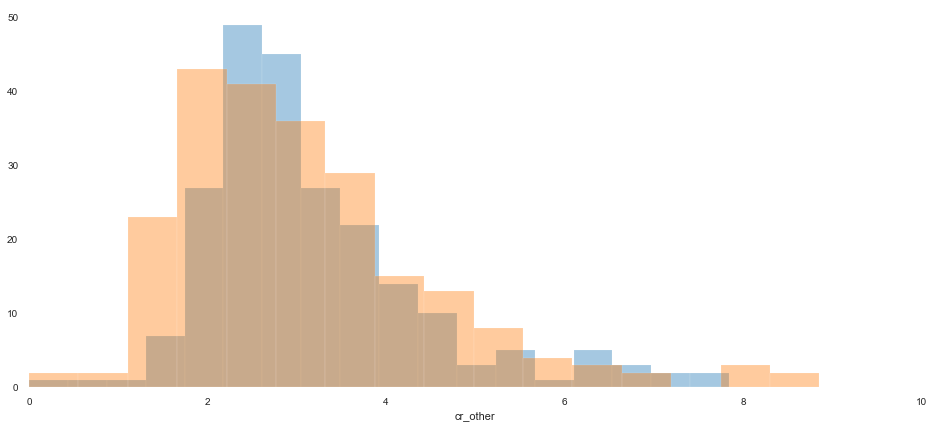

In [115]:
# построим график распределения
fig, ax = plt.subplots(figsize=(16,7))
for el in [reg_all['cr_mo_spb'], reg_all['cr_other']]:
    sns.distplot(el, ax=ax, kde=False)
ax.set_xlim([0, 10])
plt.show()

In [117]:
# проверим распределение на нормальность тестом Шапиро
reg_sh = np.concatenate((reg_all.sort_values(by=['cr_mo_spb'])['cr_mo_spb'].values, 
                        reg_all.sort_values(by=['cr_other'])['cr_other'].values))
stats.shapiro(reg_sh)

ShapiroResult(statistic=0.88506680727005, pvalue=7.421764722388121e-18)

Выборки имеют ненормальное распределение - используем непараметрические критерии. Выборки независимы, поэтому используем критерий Манна Уитни

H0: Трафик из городов присутствия не отличается от других регионов с точки зрения конверсии в целевые события

H1: Конверсия в целевые события от городов присутствия отличается от других регионов

In [118]:
stats.mannwhitneyu(reg_all['cr_mo_spb'], reg_all['cr_other'], alternative='greater')

MannwhitneyuResult(statistic=27303.5, pvalue=0.10184748890799017)

Нулевая гипотеза не может быть отвергнута - трафик из городов присутствия не отличается от других регионов с точки зрения конверсии в целевые события

## Ответы на вопросы продуктовой команды

### 1 

#### Из каких источников идет самый целевой трафик?

In [140]:
# с точки зрения CR
calc7 = sessions_df.groupby(['utm_source']).agg({'target':['sum', 'count']}).reset_index()
calc7['CR'] = round((calc7['target',   'sum'] / calc7['target', 'count'] * 100),2)
source_cr = calc7.sort_values(by=['CR'],ascending=False)
source_cr.head()

utm_source target            CR
                             sum count        
144  YpBKcihLLfFjWuxOLfvW      1     1  100.00
177  fJCYsujgSxIHFbOmgDdN      7     8   87.50
134  XzfzEBYZWgSDtJNXOadn      1     2   50.00
16   CqeIpFwJscTsZoYXdHsP      1     2   50.00
274  yxJKymlSGVuKIPTxbysx      1     3   33.33

In [138]:
# с точки зрения объема целевого трафика
source_vol = calc7.sort_values(by=[('target', 'sum')],ascending=False)
source_vol.head()

utm_source target            CR
                             sum   count      
149  ZpYIoDJMcFzVoPFsHGJL  15998  552555  2.90
176  fDLlAcSmythWSCVMvqvL  10531  277060  3.80
210  kjsLglQLzykiRbcDiGcD   6293  245178  2.57
156  bByPQxmDaMXgpHeypKSM   5557   90356  6.15
5    BHcvLfOaCWvWTykYqHVe   3882  110963  3.50

#### Из каких кампаний идет самый целевой трафик?

In [141]:
# с точки зрения CR
calc8 = sessions_df.groupby(['utm_campaign']).agg({'target':['sum', 'count']}).reset_index()
calc8['CR'] = round((calc8['target',   'sum'] / calc8['target', 'count'] * 100),2)
campaign_cr = calc8.sort_values(by=['CR'],ascending=False)
campaign_cr.head()

utm_campaign target            CR
                             sum count        
95   MHdHrBKQwbDaRalwnlJq      1     1  100.00
69   JkhCpeDGCtTwhwqWLywv      1     1  100.00
58   IRKNegNgOUQLwudzMElF      7     8   87.50
145  SbYAsCvXapXBOIxEKBZs      1     2   50.00
293  lndNIerCYECRQvBTyTye     23    75   30.67

In [143]:
# с точки зрения объема целевого трафика
campaign_vol = calc8.sort_values(by=[('target', 'sum')],ascending=False)
campaign_vol[campaign_vol.utm_campaign != 'other'].head()

utm_campaign target            CR
                             sum   count      
87   LTuZkdKfxRGVceoWkVyg  19004  422965  4.49
84   LEoPHuyFvzoNfnzGgfcd   9348  321286  2.91
255  gecBYcKZCPMcVYdSSzKP   4545  133247  3.41
39   FTjNLDyTrXaWYgZymFkV   2447  234950  1.04
348  sbJRYgVfvcnqKJNDDYIr    575   19942  2.88

#### Из каких устройств идет самый целевой трафик?

In [144]:
# с точки зрения CR
calc9 = sessions_df.groupby(['device_brand']).agg({'target':['sum', 'count']}).reset_index()
calc9['CR'] = round((calc9['target',   'sum'] / calc9['target', 'count'] * 100),2)
device_cr = calc9.sort_values(by=['CR'],ascending=False)
device_cr.head()

device_brand target            CR
                    sum count        
118       Motive      1     1  100.00
31        Condor      4     7   57.14
98    Land Rover      1     3   33.33
176        Vertu      1     3   33.33
143        Razer      1     6   16.67

In [148]:
# с точки зрения объема целевого трафика
device_vol = calc9.sort_values(by=[('target', 'sum')],ascending=False)
device_vol[(device_vol.device_brand != '(not set)') & (device_vol.device_brand != 'other')].head()

device_brand target            CR
                    sum   count      
10         Apple  14467  503526  2.87
145      Samsung  10053  311636  3.23
191       Xiaomi   6592  269242  2.45
76        Huawei   4518  173823  2.60
144       Realme    421   17925  2.35

#### Из каких локаций идет самый целевой трафик?

In [149]:
# с точки зрения CR
calc10 = sessions_df.groupby(['geo_city']).agg({'target':['sum', 'count']}).reset_index()
calc10['CR'] = round((calc10['target',   'sum'] / calc10['target', 'count'] * 100),2)
city_cr = calc10.sort_values(by=['CR'],ascending=False)
city_cr.head()

geo_city target           CR
                    sum count       
341      Brescia      1     1  100.0
1708     Qingdao      1     1  100.0
1305  Middletown      1     1  100.0
1498       Nybro      1     1  100.0
725    Gravesend      1     1  100.0

In [152]:
# с точки зрения объема целевого трафика
city_vol = calc10.sort_values(by=[('target', 'sum')],ascending=False)
city_vol[(city_vol.geo_city != 'other') & (city_vol.geo_city != '(not set)')].head()

geo_city target            CR
                          sum   count      
1346            Moscow  23625  750873  3.15
1811  Saint Petersburg   7113  278399  2.55
937              Kazan   1139   27689  4.11
1040         Krasnodar   1081   30260  3.57
2329     Yekaterinburg    887   33554  2.64

### 2

#### Какие авто пользуются наибольшим спросом?

In [161]:
# популярность
calc21 = hits_brand.groupby(['brand'], as_index=False).agg({'target_action':['sum', 'count']})
calc21['CR'] = round((calc21['target_action',   'sum'] / calc21['target_action', 'count'] * 100),2)
auto_vol = calc21.sort_values(by=[('target_action',   'count')],ascending=False)
auto_vol.head()

brand target_action            CR
                            sum   count      
16          skoda        8256.0  744486  1.11
10  mercedes-benz        2440.0  472316  0.52
18     volkswagen        5056.0  417128  1.21
7        lada-vaz        5356.0  403910  1.33
12         nissan        1386.0  238689  0.58

#### У каких авто самый лучший показатель CR?

In [160]:
# CR
auto_cr = calc21.sort_values(by=['CR'],ascending=False)
auto_cr.head()

brand target_action            CR
                         sum   count      
5     infiniti          18.0     211  8.53
4      hyundai         445.0   19032  2.34
3        honda           7.0     397  1.76
7     lada-vaz        5356.0  403910  1.33
18  volkswagen        5056.0  417128  1.21

### 3 Стоит ли увеличивать свое присутствие в соцсетях и давать там больше рекламы?

In [166]:
# посчитаем общий CR за весь период 
calc31 = sessions_df.groupby(['adv'], as_index=False).agg({'target':['sum', 'count']})
calc31['CR'] = round((calc31['target',   'sum'] / calc31['target', 'count'] * 100),2)
adv_vol = calc31.sort_values(by=[('target',   'count')],ascending=False)
adv_vol

adv target             CR
          sum    count      
0  0.0  46288  1475910  3.14
1  1.0   4021   256280  1.57

In [170]:
# посмотрим распределение по месяцам
calc32 = sessions_df.groupby(['adv', 'month'], as_index=False).agg({'target':['sum', 'count']})
calc32['CR'] = round((calc32['target',   'sum'] / calc32['target', 'count'] * 100),2)
adv_month = calc32.sort_values(by=['month'])
adv_month

adv month target            CR
                 sum   count      
0   0.0   5.0   6427  104575  6.15
8   1.0   5.0      1      16  6.25
1   0.0   6.0   6291  143165  4.39
9   1.0   6.0    318   17457  1.82
2   0.0   7.0   4818  166548  2.89
10  1.0   7.0     69    8160  0.85
3   0.0   8.0   5030  125451  4.01
11  1.0   8.0    468   29552  1.58
4   0.0   9.0   5347  188014  2.84
12  1.0   9.0    688   55789  1.23
5   0.0  10.0   6447  216137  2.98
13  1.0  10.0    667   47317  1.41
6   0.0  11.0   5655  220476  2.56
14  1.0  11.0    786   43320  1.81
7   0.0  12.0   6273  311544  2.01
15  1.0  12.0   1024   54669  1.87

Количество целевых действий от соц сетей заметно увеличивается. Тенденция явно на рост влияния соц сетей. Можно предположить, что имеет смысл увеличить присутствие в соц сетях.